# Ejercicio 1
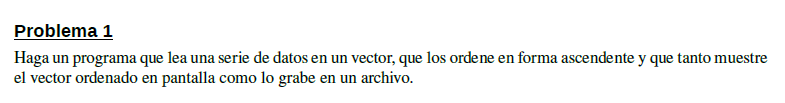

In [2]:
import numpy as np

In [3]:
dim = 5
v = np.random.rand(dim)*100

In [4]:
V= np.sort(v)

In [5]:
print(v)

[43.57032429 58.69524296 83.41530327 50.09513367 78.66367091]


In [6]:
np.save('test.npy',V)

# Ejercicio 2
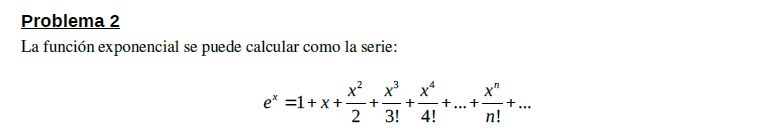

In [2]:
import math

x = 0.5
it1 = 1
it2 = x + 1
error = it2-it1
n_it = 1

while abs(error) > 1e-3 and n_it < 100:
    it1 = it2
    it2 = it2 + x**(n_it+1)/math.factorial(n_it+1)
    error = it2-it1
    #print(error)
    n_it+= 1

print("El valor de e**0,5 es %8.7f, obtenido en %3d iteraciones con un error de %6.5f" % (it2, n_it, error))

El valor de e**0,5 es 1.6486979, obtenido en   5 iteraciones con un error de 0.00026


# Ejercicio 3
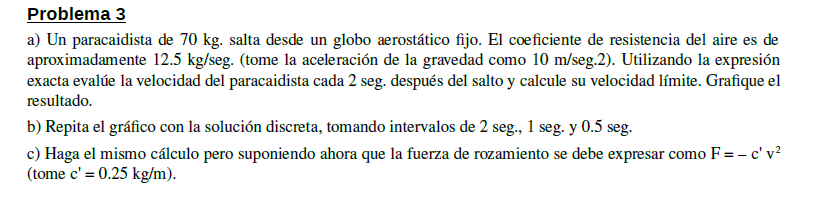

# Ejercicio 4
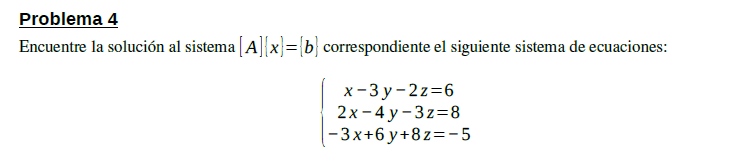

In [16]:
import numpy as np
A = np.array([[1,-3,-2],[2,-4,-3],[-3,6,8]])
b = np.array([6,8,-5])
v_sol = np.linalg.solve(A,b)
print(v_sol)
np.allclose(np.dot(A,v_sol),b)


[ 1. -3.  2.]


True

# Ejercicio 5
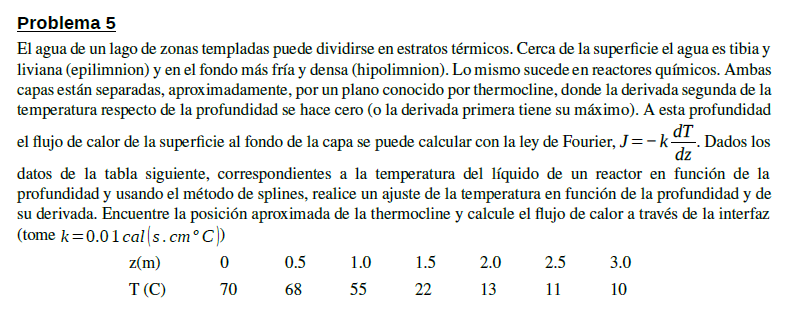

1.2000000000000002


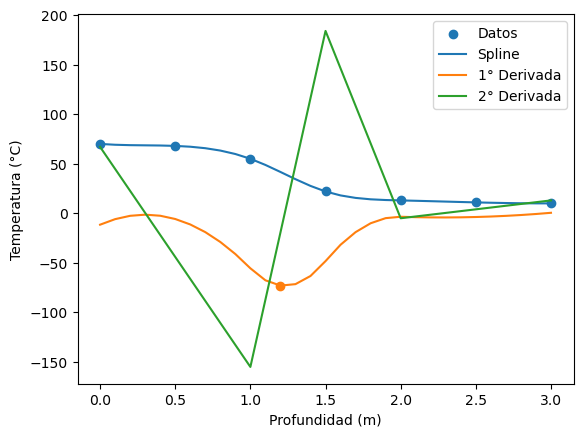

In [100]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

#z = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0])
z = np.linspace(0,3,7)
T = np.array([70,68,55,22,13,11,10])

cs = CubicSpline(z,T)
xs = np.arange(0,3.1,0.1)
#plt.plot(z,T)
#plt.xlabel('Profundidad (m)')
#plt.ylabel('Temperatura (°C)')
#plt.show

t_deriv = cs(xs,1)
idx_0 = np.argmin(t_deriv)
print(xs[idx_0])

k = 0.01
J = -k*t_deriv

#idx_0 = np.argmin(t_deriv2[10:15])+10
#print(t_deriv2)
#print(t_deriv2[idx_0])

fig, ax = plt.subplots()
ax.scatter(z,T, label = 'Datos')
ax.plot(xs,cs(xs), label = 'Spline')
ax.scatter(xs[idx_0],cs(xs[idx_0],1))
ax.plot(xs,cs(xs,1), label = '1° Derivada')
ax.plot(xs,cs(xs,2), label = '2° Derivada')
ax.set_xlabel('Profundidad (m)')
ax.set_ylabel('Temperatura (°C)')
ax.legend()



# Ejercicio 6
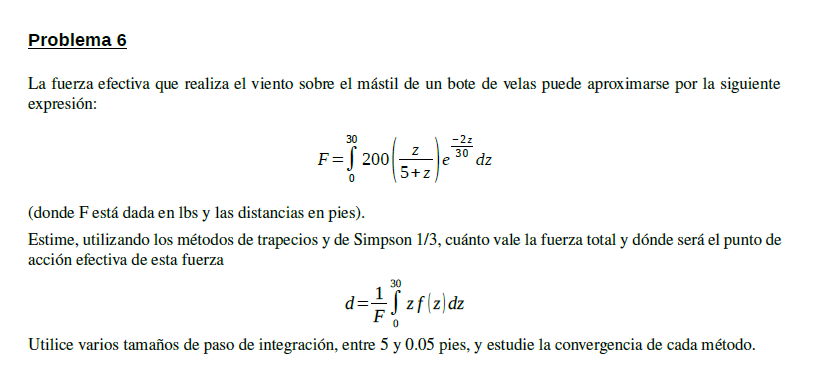